Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Juan Gómez y Nicolas Guarín-Zapata 2019. Este material es parte del curso Mecánica de los Medios Continuos en el programa de Ingeniería Civil de la Universidad EAFIT.

# Solución analitica

## Introduction

Este note book evalua la solucón analitica para una presa triangular de ángulo interno igual a $45 \circ$ sometida al empuje de un fluido de peso especifico $\gamma$ en condiciones hidroestáticas. La solución se usa para efectos de verificación del análisis por elementos finitos de una presa de sección trapezoidal.

## Solución
El dominio del problema se muestra a continuación:


<center><img src="img/dam_analitica.png" alt="mesh" style="width:400px"></center>


La solución de tensiones esta dada por:

$$
\sigma_{xx}=\gamma(y-H)
$$

$$
\sigma_{yy}=-2\gamma x-\gamma(y-H)
$$


$$
\tau_{yy}=-\gamma x
$$


## Visualización de la solución.

Para visualizar la solución usaremos la misma malla usada en el modelo de elementos finitos:

<center><img src="img/dam_mesh.png" alt="mesh" style="width:600px"></center>

In [1]:
import numpy as np       
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

In [2]:
%matplotlib notebook

#### Funciones

En el bloque siguiente se programa la solución analitica.

In [3]:
def sigxx(x, y, gamma, H):
    ux = gamma*(y - H)
    return ux


def sigyy(x, y, gamma, H):
    ux = -2.0*gamma*x - gamma*(y - H)
    return ux


def taoxy(x, y, gamma, H):
    ux = -gamma*x
    return ux

#### Subrutinas de visualización de la solución

Para visualizar la solución se usan rutinas de interpolación conjuntamente con la función de visualización de campos escalares `plot_node_field` de **SolidsPy** descrita en lo que sigue. 

In [4]:
def plot_SFIELD(UC, nodes, elements, figname, plt_type="contourf", levels=12):
    """Plots a user defined scalar field using a triangulation.
    Parameters
    ----------
    UC : ndarray (float)
      Array with the nodal solution.

    """
    x = nodes[:, 1]
    y = nodes[:, 2]
    tri = Triangulation(x, y, elements[:, 3:])
    tri_plot(tri, UC, figname, levels=levels, plt_type=plt_type)

Una vez realizada la triangulación el objeto denominado `tri` es pasado a la rutina de graficación `tri_plot` conjuntamente con el vector solución para realizar la operación de visualización final.

In [5]:
def tri_plot(tri, field, figname, title="", levels=12,
             plt_type="contourf"):
    plt.figure(figname, figsize=(6, 3))
    if plt_type == "pcolor":
        disp_plot = plt.tripcolor
    elif plt_type == "contourf":
        disp_plot = plt.tricontourf
    disp_plot(tri, field, levels)
    plt.title(title)
    plt.colorbar(orientation='vertical', shrink=0.6)
    plt.axis("image")

#### Programa principal

(1) Se lee la malla.

In [6]:
nodes = np.loadtxt('files/Dnodes.txt')
elements = np.loadtxt('files/Deles.txt', dtype=int)
coords = nodes[:, 1:3]

(2) Se evalúan las tensiones en todos los puntos

In [7]:
H_p = 225.0
SOL_x = sigxx(coords[:, 0], coords[:, 1], 9.8e3, H_p)
SOL_y = sigyy(coords[:, 0], coords[:, 1], 9.8e3, H_p)
SOL_xy = taoxy(coords[:, 0], coords[:, 1], 9.8e3, H_p)

(3) Se grafican las soluciones

## $\sigma_x$

<IPython.core.display.Javascript object>


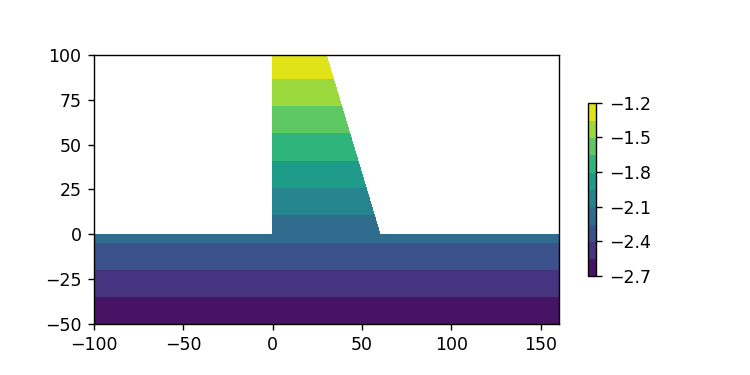

In [8]:
plot_SFIELD(SOL_x/1e6, nodes, elements, 0)

## $\sigma_y$

<IPython.core.display.Javascript object>


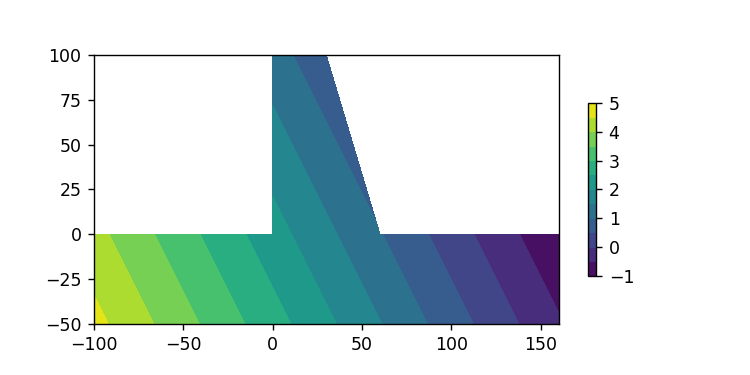

In [9]:
plot_SFIELD(SOL_y/1e6, nodes, elements, 1)

## $\tau_{xy}$

<IPython.core.display.Javascript object>


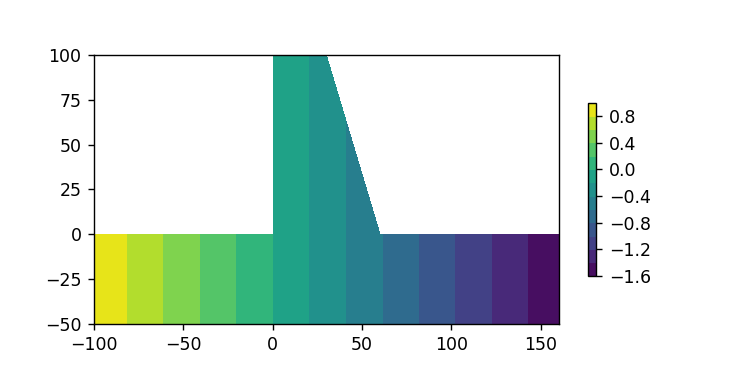

In [10]:
plot_SFIELD(SOL_xy/1e6, nodes, elements, 2)

### References

Juan Gómez, Nicolás Guarín-Zapata (2018). SolidsPy: 2D-Finite Element Analysis with Python, <https://github.com/AppliedMechanics-EAFIT/SolidsPy>.

In [11]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()